In [8]:
#Importing libraries 
import pandas as pd
import math
import matplotlib.pyplot as plt

In [9]:
#Class of planet to add values, update locations, calculating acceleration and velocity
global gc,time,numberofsteps
gc = 6.674e-11
time=10000
numberofsteps=6000
class Planet:
    
    def __init__(self):
        self.mass=""
        self.diameter=""
        self.X=0
        self.Y=0
        self.Xv=0
        self.Xy=0
        
    def add(self,mass,diameter,X,Y,Xv,Xy):
        self.mass=mass
        self.diameter=diameter
        self.X=X
        self.Y=Y
        self.Xv=Xv
        self.Xy=Xy
        
    #Calculating acceleration
    def calculate_acceleration(self,x,y,sun_mass):
        calc1=gc*sun_mass 
        calc2=pow((pow(x,2) + pow(y,2)),3/2)
        calc3=calc1/calc2
        x_acceleration= calc3 * (0-x)
        y_acceleration= calc3 * (0-y)
        return x_acceleration,y_acceleration  

    #Calculating velocity
    def calculate_velocity(self,x,y,xv,yv,sun_mass):
        xa,ya= self.calculate_acceleration(x,y,sun_mass)
        new_x_velocity=xv+(xa*time)
        new_y_velocity=yv+(ya*time)
        return new_x_velocity,new_y_velocity
    #Calculating location
    def update_location(self,xl,yl,xv,yv):
        new_x_loc=xl+(xv *time)
        new_y_loc=yl+(yv *time)
        return new_x_loc,new_y_loc

In [10]:
def readingData(filename):
    #reading csv file
    df=pd.read_csv(filename)

    #Only filtering rows whose data is required
    df=df[df['Planet'].isin(["Mercury","Venus","Earth","Mars","Sun"])]
    df.set_index('Planet')

    #Converting the df to list to access the elements
    List= df.to_numpy().tolist()

    #Accessing Sun elements
    sun_mass=df[df['Planet']=="Sun"]['Mass (kg)'].values[0]
    
    return sun_mass,List

In [11]:
def adding_values(List):
    #Loop to iterate through each element to add elements
    for i in range(0,len(List)):
        if List[i][0]=="Mercury":
            mercury=Planet()
            mercury.add(List[i][1],List[i][2],List[i][3],List[i][4],List[i][5],List[i][6])
        elif List[i][0]=="Venus":
            venus=Planet()
            venus.add(List[i][1],List[i][2],List[i][3],List[i][4],List[i][5],List[i][6])

        elif List[i][0]=="Earth":
            earth=Planet()
            earth.add(List[i][1],List[i][2],List[i][3],List[i][4],List[i][5],List[i][6])
        elif List[i][0]=="Mars":
            mars=Planet()
            mars.add(List[i][1],List[i][2],List[i][3],List[i][4],List[i][5],List[i][6]) 
    Obj=[mercury,venus,earth,mars]
    return  Obj

In [13]:
def update_graph(Obj,sun_mass):
    #setting colors for each orbit
    colors=["pink","blue","green","orange"]
    count=4
    #setting marker sizes 
    marker_sizes=[5,9,8,4]
    
    #setting title,x,y labels
    plt.title('Solar System')
    plt.ylabel("Y Location") 
    plt.xlabel("X Location") 
    
    #iterating through each object to plot orbit
    for self in Obj:
        count=count-1
        X_loc=[self.X]
        Y_loc=[self.Y]
        plt.plot(X_loc,Y_loc, marker="o",markersize=marker_sizes[count])    
        for i in range(0,6000):
            #Updating values
            self.Xv,self.Xy=self.calculate_velocity(self.X,self.Y,self.Xv,self.Xy,sun_mass)
            self.X,self.Y=self.update_location(self.X,self.Y,self.Xv,self.Xy)
            X_loc.append(self.X)
            Y_loc.append(self.Y)
        # apply legend()
        plt.legend(["Mercury" ,"Venus","Earth","Mars"])
        plt.plot(X_loc, Y_loc, color = colors[count])
    


In [16]:
def start():
    #Calling functions to read file,add values and plot graph
    filename="Planet_size_and_locations.csv"
    sun_mass,List=readingData(filename)
    Obj=adding_values(List)
    update_graph(Obj,sun_mass)
    return Obj , sun_mass
    

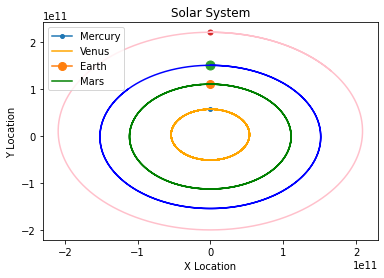

In [18]:
#Initial position of planets
Obj,sun_mass=start()

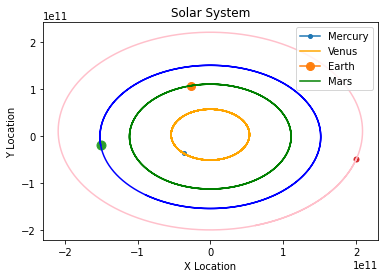

In [20]:
#Updated position 
update_graph(Obj,sun_mass)